**Goal of this kernel is to compare NN and ARIMA modelling. We will be predicting Bitcoin prices with help of Bitcoin historical data.**

In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.


# Functions

In [2]:
def create_model(nunits):

    # Initialising the RNN
    regressor = Sequential()

    # Adding the input layer and the LSTM layer
    regressor.add(LSTM(units = nunits, activation = 'sigmoid', input_shape = (None, 1)))

    # Adding the output layer
    regressor.add(Dense(units = 1))

    # Compiling the RNN
    regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
    
    return regressor

# Data

In [3]:
# Import the dataset and encode the date
df = pd.read_csv("../input/bitcoin-historical-data/bitstampUSD_1-min_data_2012-01-01_to_2020-12-31.csv")
df['date'] = pd.to_datetime(df['Timestamp'],unit='s').dt.date
group = df.groupby('date')
Real_Price = group['Weighted_Price'].mean()

Bitcoin predictions are going to be for a month, that is why we need to split the dataset accordingly

In [4]:
# split data
prediction_days = 30
df_train= Real_Price[:len(Real_Price)-prediction_days]
df_test= Real_Price[len(Real_Price)-prediction_days:]

In [5]:
# Data preprocess
training_set = df_train.values
training_set = np.reshape(training_set, (len(training_set), 1))

sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
X_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]
X_train = np.reshape(X_train, (len(X_train), 1, 1))

# Model

In [6]:

# Initialising the RNN
regressor = create_model(nunits = 4)

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 5, epochs = 100)

Epoch 1/100
3255/3255 [==============================] - 6s 2ms/step - loss: 0.0675
Epoch 2/100
3255/3255 [==============================] - 3s 930us/step - loss: 0.0360
Epoch 3/100
3255/3255 [==============================] - 3s 811us/step - loss: 0.0240
Epoch 4/100
3255/3255 [==============================] - 3s 812us/step - loss: 0.0117
Epoch 5/100
3255/3255 [==============================] - 3s 812us/step - loss: 0.0033
Epoch 6/100
3255/3255 [==============================] - 3s 905us/step - loss: 4.9792e-04
Epoch 7/100
3255/3255 [==============================] - 3s 819us/step - loss: 1.2719e-04
Epoch 8/100
3255/3255 [==============================] - 3s 1ms/step - loss: 1.1257e-04
Epoch 9/100
3255/3255 [==============================] - 3s 824us/step - loss: 1.1237e-04
Epoch 10/100
3255/3255 [==============================] - 3s 907us/step - loss: 1.1109e-04
Epoch 11/100
3255/3255 [==============================] - 3s 830us/step - loss: 1.1221e-04
Epoch 12/100
3255/3255 [========

**NOTE!!!** Key thing is following and that is why NN COULD "fail". WE used values of today to predict the future values. That is not really failure of NN but jsut goes to show that we need to think about what are we "feeding" our NN with. Because it can happen that NN will only learn that price will be slightly higher than yesterdays price. Which is true, except when it is not. Than we fail big.

In [7]:
# Making the predictions
test_set = df_test.values
inputs = np.reshape(test_set, (len(test_set), 1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))
predicted_BTC_price = regressor.predict(inputs)
predicted_BTC_price = sc.inverse_transform(predicted_BTC_price)

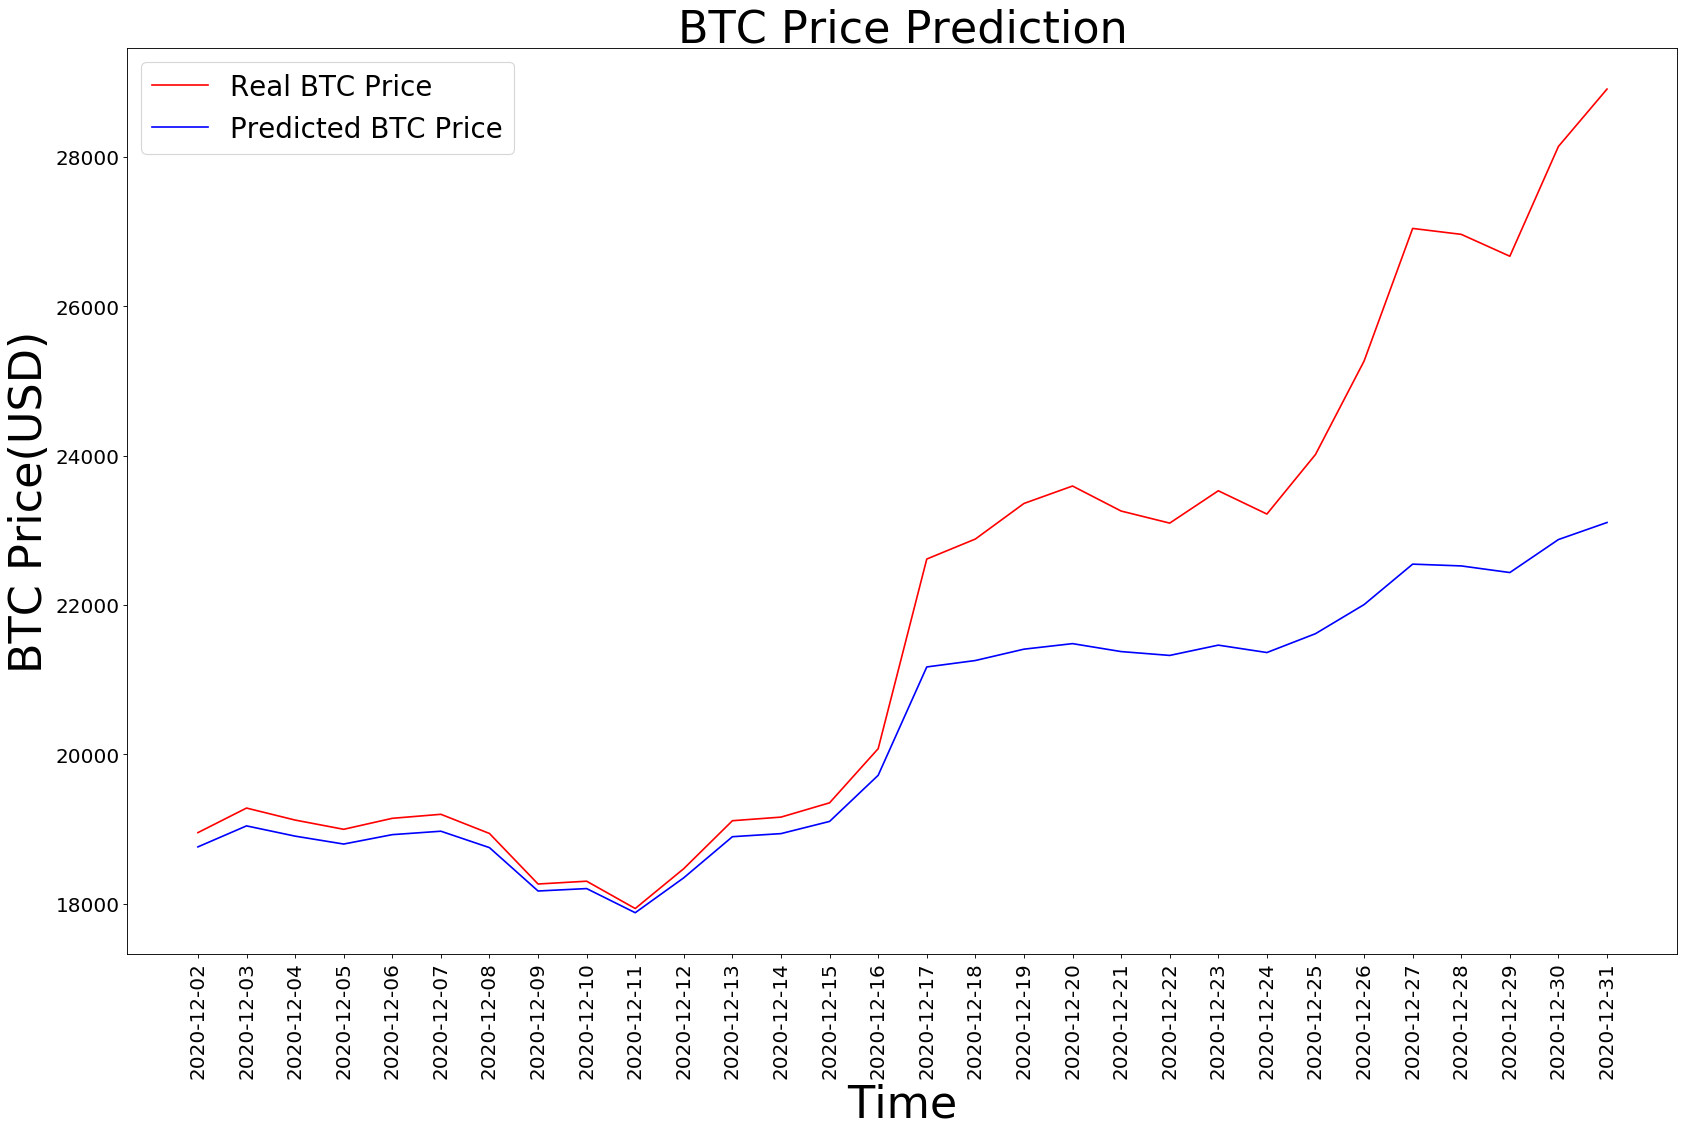

In [8]:
# Visualising the results
plt.figure(figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()  
plt.plot(test_set, color = 'red', label = 'Real BTC Price')
plt.plot(predicted_BTC_price, color = 'blue', label = 'Predicted BTC Price')
plt.title('BTC Price Prediction', fontsize=40)
df_test = df_test.reset_index()
x=df_test.index
labels = df_test['date']
plt.xticks(x, labels, rotation = 'vertical')
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
plt.xlabel('Time', fontsize=40)
plt.ylabel('BTC Price(USD)', fontsize=40)
plt.legend(loc=2, prop={'size': 25})
plt.savefig('B16254_09_03_KB300.png', dpi = 300)
plt.savefig('B16254_09_03_KB450.png', dpi = 450)
plt.savefig('B16254_09_03_KB600.png', dpi = 600)
plt.show()


In [9]:
# plt.savefig('B16254_09_03_KB300.png', dpi = 300)
# plt.savefig('B16254_09_03_KB450.png', dpi = 450)
# plt.savefig('B16254_09_03_KB600.png', dpi = 600)
